In [1]:
### conflits with Deepnote ###

# matplotlib inline plotting
%matplotlib inline
# make inline plotting higher resolution
%config InlineBackend.figure_format = 'svg'

### conflits with Deepnote ###

In [2]:
#!pip install statsmodels
#!pip install seaborn
#!pip install xlrd

In [3]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('ggplot')

In [4]:
meta_dk = pd.read_excel('Samlet Data - Danske Fonde.xlsx', engine='openpyxl', sheet_name='meta')
returns_dk = pd.read_excel('Samlet Data - Danske Fonde.xlsx', engine='openpyxl', sheet_name='returns')

meta_gl = pd.read_excel('Samlet Data - Globale Fonde.xlsx', engine='openpyxl', sheet_name='meta')
returns_gl = pd.read_excel('Samlet Data - Globale Fonde.xlsx', engine='openpyxl', sheet_name='returns')

In [5]:
meta_gl['location'] = 'GL'
meta_dk['location'] = 'DK'
meta = meta_dk.append(meta_gl).reset_index(drop=True)

meta.head()

,Name,ID in returns,ISIN,IFR-kategorier,Aktiv/Passiv,First Date,Last Date,Years Active,location
0,BankInvest Danske Aktier A,m0,DK0016060346,Aktier Danmark,Aktiv,2000-01-10,2020-01-08,19.83,DK
1,C WorldWide Danmark KL,m1,DK0010249655,Aktier Danmark,Aktiv,2000-01-01,2020-01-08,20.58,DK
2,"Danske Invest Danmark - Akkumulerende, klasse DKK",m2,DK0016208515,Aktier Danmark,Aktiv,2002-01-12,2020-01-08,17.67,DK
3,"Danske Invest Danmark Fokus, klasse DKK d",m3,DK0060244325,Aktier Danmark,Aktiv,2000-01-01,2020-01-08,20.58,DK
4,"Danske Invest Danmark Indeks ex OMXC20, klasse...",m4,DK0060244242,Aktier Danmark,Passiv,2000-01-01,2020-01-08,20.58,DK


In [6]:
returns_dk = returns_dk.set_index('DATE')
returns_gl = returns_gl.set_index('DATE')

factors_gl = returns_gl[['D_rf', 'W_R', 'W_SMB', 'W_HML']]
factors_dk = returns_dk[['D_rf', 'D_R', 'D_SMB', 'D_HML']]

returns_gl = returns_gl.drop(columns=['D_rf', 'W_R', 'W_SMB', 'W_HML'])
returns_dk = returns_dk.drop(columns=['D_rf', 'D_R', 'D_SMB', 'D_HML'])

In [7]:
returns_gl = returns_gl.rename(columns=meta_gl[['Name', 'ID in returns']].set_index('ID in returns').to_dict()['Name'])
returns_dk = returns_dk.rename(columns=meta_dk[['Name', 'ID in returns']].set_index('ID in returns').to_dict()['Name'])
returns = returns_dk.join(returns_gl)

In [8]:
returns.head()

,BankInvest Danske Aktier A,C WorldWide Danmark KL,"Danske Invest Danmark - Akkumulerende, klasse DKK","Danske Invest Danmark Fokus, klasse DKK d","Danske Invest Danmark Indeks ex OMXC20, klasse DKK d","Danske Invest Danmark Indeks, klasse DKK d","Danske Invest Danmark, klasse DKK d",Handelsinvest Danmark AK,Jyske Invest Danske Aktier KL,LI Aktier Danmark Indeks,...,Sparinvest Cumulus Value KL A,Sparinvest INDEX Dow Jones Sustainability World KL,Sparinvest INDEX Global Aktier Min. Risiko KL,Sparinvest Momentum Aktier Akk. KL A,Sparinvest Momentum Aktier KL A,Sparinvest Value Aktier KL A,Sydinvest Global Value Equities B EUR Acc,Sydinvest Verden Ligevægt & Value A DKK,"ValueInvest Danmark, Global A","ValueInvest Danmark, Global Akkumulerende A"
DATE,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.0551,0.0414,0.0405,0.0423,0.0694,0.0365,0.0408,0.0402,0.0565,0.0390,...,0.0345,0.0412,0.0089,0.0302,0.0299,0.0365,0.0233,0.0233,0.0111,0.0106
2020-07-01,0.0601,0.0518,0.0575,0.0595,0.0298,0.0533,0.0574,0.0542,0.0604,0.0534,...,-0.0246,-0.0068,-0.0090,0.0165,0.0181,-0.0277,-0.0250,-0.0267,-0.0130,-0.0128
2020-06-01,0.0183,0.0098,0.0078,0.0068,-0.0057,0.0076,0.0077,0.0142,0.0188,0.0126,...,0.0148,0.0266,-0.0031,0.0255,0.0262,0.0143,0.0069,0.0080,-0.0005,-0.0005
2020-05-01,0.0883,0.0800,0.0856,0.0848,0.0827,0.0828,0.0857,0.0846,0.0889,0.0822,...,0.0131,0.0277,0.0169,0.0377,0.0357,0.0127,0.0104,0.0105,0.0073,0.0078
2020-04-01,0.1032,0.0863,0.0956,0.0908,0.0847,0.0946,0.0959,0.0982,0.1040,0.0884,...,0.0951,0.0970,0.0870,0.1066,0.1063,0.0974,0.1123,0.1122,0.0664,0.0667


In [9]:
meta['ID in returns'] = [f'{j}_{i}' for i, j in meta['location'].to_dict().items()]

meta.tail()

,Name,ID in returns,ISIN,IFR-kategorier,Aktiv/Passiv,First Date,Last Date,Years Active,location
57,Sparinvest Value Aktier KL A,GL_57,DK0010079631,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58,GL
58,Sydinvest Global Value Equities B EUR Acc,GL_58,DK0060647600,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58,GL
59,Sydinvest Verden Ligevægt & Value A DKK,GL_59,DK0010101740,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58,GL
60,"ValueInvest Danmark, Global A",GL_60,DK0010246396,Aktier Globale,Aktiv,2000-01-01,2020-01-08,20.58,GL
61,"ValueInvest Danmark, Global Akkumulerende A",GL_61,DK0060032498,Aktier Globale,Aktiv,2006-01-12,2020-01-08,13.67,GL


In [10]:
returns = returns.rename(columns=meta[['Name', 'ID in returns']].set_index('Name').to_dict()['ID in returns'])

returns.head()

,DK_0,DK_1,DK_2,DK_3,DK_4,DK_5,DK_6,DK_7,DK_8,DK_9,...,GL_52,GL_53,GL_54,GL_55,GL_56,GL_57,GL_58,GL_59,GL_60,GL_61
DATE,,,,,,,,,,,,,,,,,,,,,
2020-08-01,0.0551,0.0414,0.0405,0.0423,0.0694,0.0365,0.0408,0.0402,0.0565,0.0390,...,0.0345,0.0412,0.0089,0.0302,0.0299,0.0365,0.0233,0.0233,0.0111,0.0106
2020-07-01,0.0601,0.0518,0.0575,0.0595,0.0298,0.0533,0.0574,0.0542,0.0604,0.0534,...,-0.0246,-0.0068,-0.0090,0.0165,0.0181,-0.0277,-0.0250,-0.0267,-0.0130,-0.0128
2020-06-01,0.0183,0.0098,0.0078,0.0068,-0.0057,0.0076,0.0077,0.0142,0.0188,0.0126,...,0.0148,0.0266,-0.0031,0.0255,0.0262,0.0143,0.0069,0.0080,-0.0005,-0.0005
2020-05-01,0.0883,0.0800,0.0856,0.0848,0.0827,0.0828,0.0857,0.0846,0.0889,0.0822,...,0.0131,0.0277,0.0169,0.0377,0.0357,0.0127,0.0104,0.0105,0.0073,0.0078
2020-04-01,0.1032,0.0863,0.0956,0.0908,0.0847,0.0946,0.0959,0.0982,0.1040,0.0884,...,0.0951,0.0970,0.0870,0.1066,0.1063,0.0974,0.1123,0.1122,0.0664,0.0667


In [11]:
# Annualize all returns (smart for interpreting alpha also as annual abnormal return)
for mf in returns.columns:
    returns[mf] = returns[mf] - factors_dk['D_rf']

returns = returns * 12 * 100
factors_gl = factors_gl * 12 * 100
factors_dk = factors_dk * 12 * 100


display(factors_gl.head())
display(factors_dk.head())

,D_rf,W_R,W_SMB,W_HML
DATE,,,,
2020-08-01,-0.24,63.204,-16.176,-45.228
2020-07-01,-0.24,-0.780,-9.960,-48.888
2020-06-01,-0.24,18.252,-1.680,-44.796
2020-05-01,-0.24,40.236,30.852,-43.056
2020-04-01,-0.24,141.156,32.772,-47.988


,D_rf,D_R,D_SMB,D_HML
DATE,,,,
2020-08-01,-0.288,37.776,59.172,-50.532
2020-07-01,-0.276,44.340,17.124,145.716
2020-06-01,-0.264,14.124,-15.408,29.112
2020-05-01,-0.216,68.532,94.008,-50.712
2020-04-01,-0.228,102.324,75.708,-8.628


In [12]:
def sort_and_mean_returns(key1, key2, col):
    selectFunds1 = meta['ID in returns'].loc[meta[col] == key1]
    selectFunds2 = meta['ID in returns'].loc[meta[col] == key2]
    
    print(f'Number of {key1} funds: {selectFunds1.shape[0]}')
    print(f'Number of {key2} funds: {selectFunds2.shape[0]}')
    
    selectFunds1 = returns[selectFunds1].mean(axis=1)
    selectFunds2 = returns[selectFunds2].mean(axis=1)
    
    selectFunds1.name = key1
    selectFunds2.name = key2
    
    return pd.concat([selectFunds1, selectFunds2], axis=1)

In [13]:
ActivePassive = sort_and_mean_returns('Aktiv', 'Passiv', 'Aktiv/Passiv')

ActivePassive = ActivePassive.join(factors_gl)
ActivePassive = ActivePassive.join(factors_dk.drop(columns=['D_rf']))

ActivePassive.head()

Number of Aktiv funds: 55
Number of Passiv funds: 7


,Aktiv,Passiv,D_rf,W_R,W_SMB,W_HML,D_R,D_SMB,D_HML
DATE,,,,,,,,,
2020-08-01,48.925091,55.762286,-0.24,63.204,-16.176,-45.228,37.776,59.172,-50.532
2020-07-01,18.996000,15.687429,-0.24,-0.780,-9.960,-48.888,44.340,17.124,145.716
2020-06-01,16.160727,14.646857,-0.24,18.252,-1.680,-44.796,14.124,-15.408,29.112
2020-05-01,52.891636,55.107429,-0.24,40.236,30.852,-43.056,68.532,94.008,-50.712
2020-04-01,122.780727,118.428000,-0.24,141.156,32.772,-47.988,102.324,75.708,-8.628


In [14]:
LocalGlobal = sort_and_mean_returns('DK', 'GL', 'location')

LocalGlobal = LocalGlobal.join(factors_gl)
LocalGlobal = LocalGlobal.join(factors_dk.drop(columns=['D_rf']))

LocalGlobal.head()

Number of DK funds: 20
Number of GL funds: 42


,DK,GL,D_rf,W_R,W_SMB,W_HML,D_R,D_SMB,D_HML
DATE,,,,,,,,,
2020-08-01,58.572,45.470857,-0.24,63.204,-16.176,-45.228,37.776,59.172,-50.532
2020-07-01,66.822,-4.329714,-0.24,-0.780,-9.960,-48.888,44.340,17.124,145.716
2020-06-01,11.244,18.249714,-0.24,18.252,-1.680,-44.796,14.124,-15.408,29.112
2020-05-01,101.010,30.347429,-0.24,40.236,30.852,-43.056,68.532,94.008,-50.712
2020-04-01,119.064,123.825143,-0.24,141.156,32.772,-47.988,102.324,75.708,-8.628


In [15]:
start_date = '01-01-2010'
end_date = '08-01-2020'

ActivePassive = ActivePassive.loc[(ActivePassive.index <= end_date) & (ActivePassive.index >= start_date)]
LocalGlobal = LocalGlobal.loc[(LocalGlobal.index <= end_date) & (LocalGlobal.index >= start_date)]

In [16]:
nw_lags = round(3/4 * LocalGlobal.shape[0]**(1/3))

In [26]:
Y = ActivePassive['Aktiv'] - ActivePassive['Passiv']
X = ActivePassive[['W_R', 'W_SMB', 'W_HML', 'D_HML', 'D_R', 'D_SMB']]
#X = ActivePassive[['W_R', 'W_SMB', 'W_HML']]
X = sm.add_constant(X)

mdlFit_ActivePassive = sm.OLS(endog=Y, exog=X).fit()

mdlFit_ActivePassive = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': nw_lags}, use_t=True) # newey-west
#mdlFit_ActivePassive = sm.OLS(endog=Y, exog=X).fit()

mdlFit_ActivePassive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     16.01
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.74e-13
Time:                        16:14:21   Log-Likelihood:                -401.25
No. Observations:                 128   AIC:                             816.5
Df Residuals:                     121   BIC:                             836.5
Df Model:                           6                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8020      0.631     -1.272      0.206      -2.050       0.446
W_R           -0.0429      0.015     -2.841      0.005      -0.073      -0.013
W_SMB          0.0752      0.024      3.148      0.002       0.028       0.123
W_HML         -0.0219      0.021     -1.043      0.299      -0.063       0.020
D_HML          0.0166      0.009      1.913      0.058      -0.001       0.034
D_R            0.0706      0.018      3.864      0.000       0.034       0.107
D_SMB          0.0034      0.015      0.224      0.823      -0.027       0.033
==============================================================================
Omnibus:                       27.023   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.163
Skew:                           0.918   Prob(JB):                     7.76e-12
Kurtosis:                       5.495   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [27]:
Y = LocalGlobal['DK'] - LocalGlobal['GL']
X = LocalGlobal[['W_R', 'W_SMB', 'W_HML', 'D_HML', 'D_R', 'D_SMB']]
X = sm.add_constant(X)

mdlFit_LocalGlobal = sm.OLS(endog=Y, exog=X).fit(cov_type='HAC', cov_kwds={'maxlags': nw_lags}, use_t=True) # newey-west
#mdlFit_LocalGlobal = sm.OLS(endog=Y, exog=X).fit()

mdlFit_LocalGlobal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.07e-66
Time:                        16:14:21   Log-Likelihood:                -450.44
No. Observations:                 128   AIC:                             914.9
Df Residuals:                     121   BIC:                             934.9
Df Model:                           6                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9096      0.933      0.974      0.332      -0.938       2.758
W_R           -0.8254      0.029    -28.654      0.000      -0.882      -0.768
W_SMB         -0.1090      0.043     -2.510      0.013      -0.195      -0.023
W_HML         -0.0465      0.042     -1.113      0.268      -0.129       0.036
D_HML          0.0546      0.015      3.655      0.000       0.025       0.084
D_R            0.8392      0.024     34.779      0.000       0.791       0.887
D_SMB          0.3593      0.019     19.156      0.000       0.322       0.396
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.578
Skew:                           0.348   Prob(JB):                        0.276
Kurtosis:                       3.011   Cond. No.                         86.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [28]:
ActivePassiveRes = pd.concat([mdlFit_ActivePassive.params, mdlFit_ActivePassive.bse, mdlFit_ActivePassive.tvalues], axis=1)
ActivePassiveRes = ActivePassiveRes.rename(columns={0: ('Active/Passive', 'Coefficient'), 
                                                    1: ('Active/Passive', 'NW Std. Error'), 
                                                    2: ('Active/Passive', 'T-stat')})
ActivePassiveRes

,"(Active/Passive, Coefficient)","(Active/Passive, NW Std. Error)","(Active/Passive, T-stat)"
const,-0.802030,0.630594,-1.271864
W_R,-0.042878,0.015092,-2.841127
W_SMB,0.075215,0.023891,3.148313
W_HML,-0.021873,0.020973,-1.042941
D_HML,0.016626,0.008691,1.913006
D_R,0.070635,0.018282,3.863595
D_SMB,0.003405,0.015187,0.224181


In [29]:
LocalGlobalRes = pd.concat([mdlFit_LocalGlobal.params, mdlFit_LocalGlobal.bse, mdlFit_LocalGlobal.tvalues], axis=1)
LocalGlobalRes = LocalGlobalRes.rename(columns={0: ('Global/Domestic', 'Coefficient'), 
                                                1: ('Global/Domestic', 'NW Std. Error'),
                                                2: ('Global/Domestic', 'T-stat')})
LocalGlobalRes

,"(Global/Domestic, Coefficient)","(Global/Domestic, NW Std. Error)","(Global/Domestic, T-stat)"
const,0.909582,0.933453,0.974427
W_R,-0.825441,0.028807,-28.654407
W_SMB,-0.109050,0.043449,-2.509857
W_HML,-0.046462,0.041743,-1.113046
D_HML,0.054640,0.014948,3.655477
D_R,0.839212,0.024130,34.779319
D_SMB,0.359259,0.018754,19.156035


In [30]:
results = LocalGlobalRes.join(ActivePassiveRes)

results.columns = pd.MultiIndex.from_tuples(results.columns)

results = results.transpose().rename(columns={'const': 'alpha'}).transpose()

print(results.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{3}{l}{Global/Domestic} & \multicolumn{3}{l}{Active/Passive} \\
{} &     Coefficient & NW Std. Error &     T-stat &    Coefficient & NW Std. Error &    T-stat \\
\midrule
alpha &        0.909582 &      0.933453 &   0.974427 &      -0.802030 &      0.630594 & -1.271864 \\
W\_R   &       -0.825441 &      0.028807 & -28.654407 &      -0.042878 &      0.015092 & -2.841127 \\
W\_SMB &       -0.109050 &      0.043449 &  -2.509857 &       0.075215 &      0.023891 &  3.148313 \\
W\_HML &       -0.046462 &      0.041743 &  -1.113046 &      -0.021873 &      0.020973 & -1.042941 \\
D\_HML &        0.054640 &      0.014948 &   3.655477 &       0.016626 &      0.008691 &  1.913006 \\
D\_R   &        0.839212 &      0.024130 &  34.779319 &       0.070635 &      0.018282 &  3.863595 \\
D\_SMB &        0.359259 &      0.018754 &  19.156035 &       0.003405 &      0.015187 &  0.224181 \\
\bottomrule
\end{tabular}



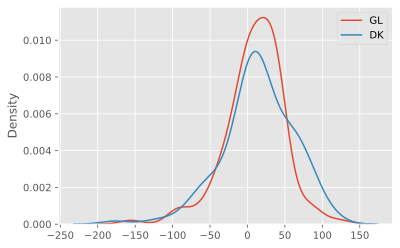

In [22]:
sns.kdeplot(LocalGlobal['GL'], label='GL')
sns.kdeplot(LocalGlobal['DK'], label='DK')

plt.xlabel(None)

plt.legend()

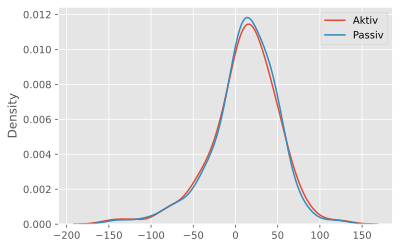

In [23]:
sns.kdeplot(ActivePassive['Aktiv'], label='Aktiv')
sns.kdeplot(ActivePassive['Passiv'], label='Passiv')

plt.xlabel(None)

plt.legend()

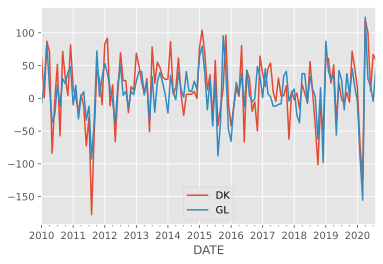

In [24]:
fig, ax = plt.subplots(1,1, dpi=140)

LocalGlobal[['DK', 'GL']].plot(ax=ax)

plt.show()

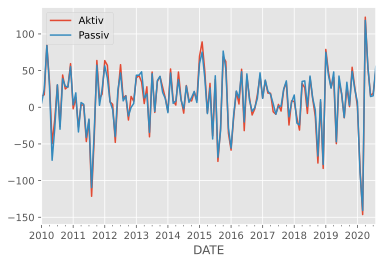

In [25]:
fig, ax = plt.subplots(1,1, dpi=140)

ActivePassive[['Aktiv', 'Passiv']].plot(ax=ax)

plt.show()